In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio

## Data

### warblrb10k

warblrb10k is a collection of 10,000 smartphone audio recordings from around the UK, crowdsourced by users of Warblr the bird recognition app. The audio covers a wide distribution of UK locations and environments, and includes weather noise, traffic noise, human speech and even human bird imitations.


In [147]:
# Load the metadata of our audio files
warblrb10k = pd.read_csv("../data/warblrb10k_public_metadata.csv", delimiter=",", header=0)
nobirds = warblrb10k[warblrb10k["hasbird"] == 0]["itemid"].reset_index(drop=True)
birds = warblrb10k[warblrb10k["hasbird"] == 1]["itemid"].reset_index(drop=True)

# Print
print("Files w/o birds")
print(nobirds.head())
print("Size:", len(nobirds))
print("--------------------------")
print("Files w/ birds")
print(birds.head())
print("Size:", len(birds))

Files w/o birds
0    ab322d4b-da69-4b06-a065
1    519cfbe6-f804-4add-baa3
2    479b90e3-85bf-403c-8298
3    b7a49bf2-f898-41ec-be40
4    4c6d2568-17f6-4ca7-b347
Name: itemid, dtype: object
Size: 1955
--------------------------
Files w/ birds
0    759808e5-f824-401e-9058
1    1d94fc4a-1c63-4da0-9cac
2    bb0099ce-3073-4613-8557
3    c4c67e81-9aa8-4af4-8eb7
4    6332d960-6f57-4ecc-8d1a
Name: itemid, dtype: object
Size: 6045


### freefield1010

freefield1010 is a collection of 7,690 excerpts from field recordings around the world, gathered by the FreeSound project, and then standardised for research.

In [150]:
path = "../data/ff1010bird/wav"

# Load the metadata of our audio files
ff1010bird = pd.read_csv("../data/ff1010bird_metadata.csv", delimiter=",", header=0)
nobirds = ff1010bird[ff1010bird["hasbird"] == 0]["itemid"].reset_index(drop=True)
birds = ff1010bird[ff1010bird["hasbird"] == 1]["itemid"].reset_index(drop=True)

# Print
print("Files w/o birds")
print(nobirds.head())
print("Size:", len(nobirds))
print("--------------------------")
print("Files w/ birds")
print(birds.head())
print("Size:", len(birds))

Files w/o birds
0     64486
1      2525
2     44981
3    101323
4    165746
Name: itemid, dtype: int64
Size: 5755
--------------------------
Files w/ birds
0     19037
1     71838
2     97375
3     72827
4    166175
Name: itemid, dtype: int64
Size: 1935


Données déséquilibrées dans un cas comme dans l'autre, mais beaucoup plus de données avec des oiseaux dans warblrb10k.

## Audio file w/o birds

In [155]:
# Example audio w/o birds
y, sr = librosa.load(f"{path}/{nobirds[0]}.wav")

Audio(data=y, rate=sr)

[Text(0, 0.5, 'Default chroma')]

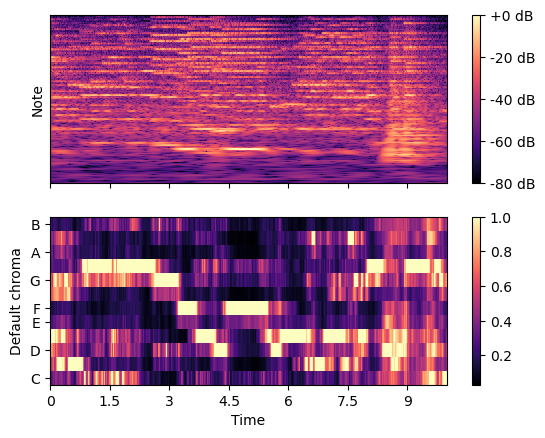

In [156]:
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                                y_axis='cqt_note', x_axis='time', bins_per_octave=12*3,
                                ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")
ax[0].label_outer()

img2 = librosa.display.specshow(chroma_orig, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Default chroma')

`magphase` : Separate a complex-valued spectrogram $D$ into its magnitude ($S$) and phase ($P$) components, so that $D = S \times P$.

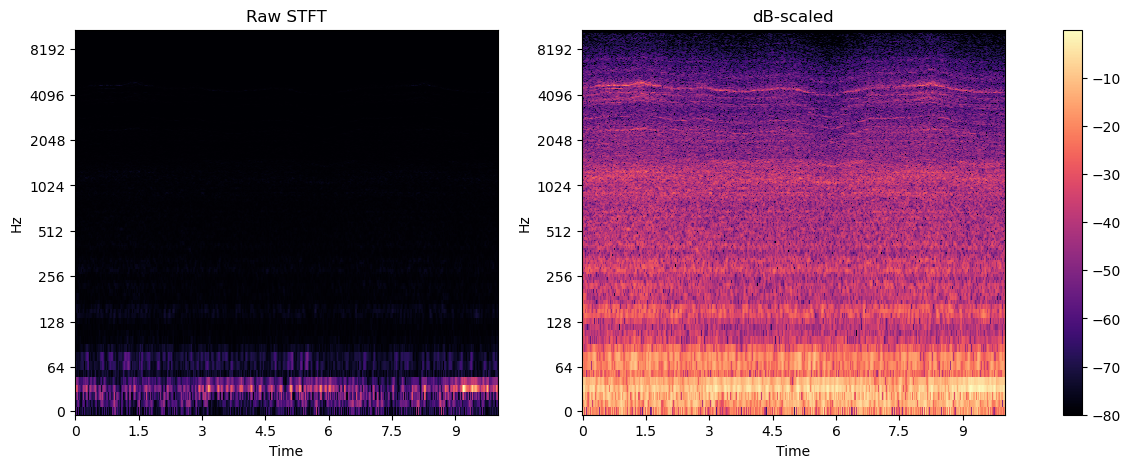

In [154]:
# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))


###################
# Plot the spectrum
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
img = librosa.display.specshow(S_full, y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set_title("Raw STFT")
img = librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set_title("dB-scaled")
fig.colorbar(img, ax=ax);

Un spectrogramme classique que l'on retrouve dans les enregistrements de chansons...

## Audio file w/ birds

In [103]:
# Example audio w/ birds
y, sr = librosa.load(f"{path}/{birds[0]}.wav")

Audio(data=y, rate=sr)

### Chromagrams

[Text(0, 0.5, 'Default chroma')]

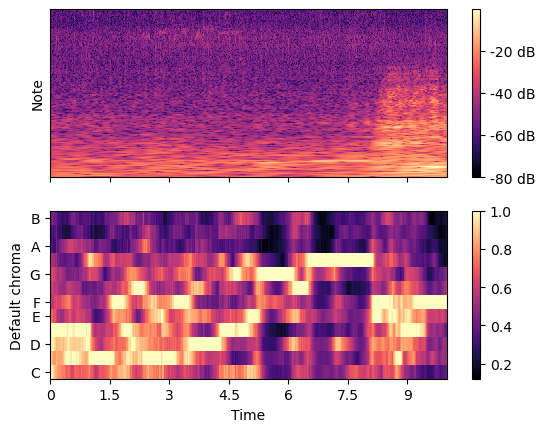

In [104]:
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                                y_axis='cqt_note', x_axis='time', bins_per_octave=12*3,
                                ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")
ax[0].label_outer()

img2 = librosa.display.specshow(chroma_orig, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Default chroma')

[Text(0, 0.5, 'Harmonic')]

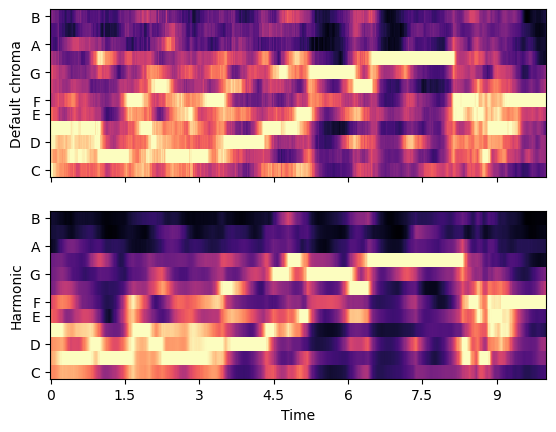

In [105]:
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr)


fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_orig, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='Default chroma')
ax[0].label_outer()

librosa.display.specshow(chroma_harm, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='Harmonic')

[Text(0, 0.5, 'Non-local')]

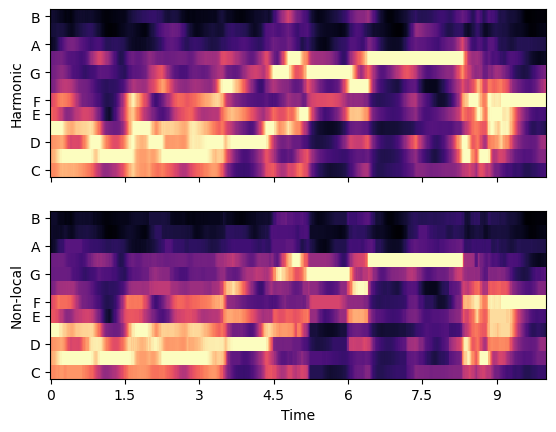

In [106]:
chroma_filter = np.minimum(chroma_harm,
                           librosa.decompose.nn_filter(chroma_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))


fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_harm, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='Harmonic')
ax[0].label_outer()

librosa.display.specshow(chroma_filter, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='Non-local')

[Text(0, 0.5, 'Median-filtered')]

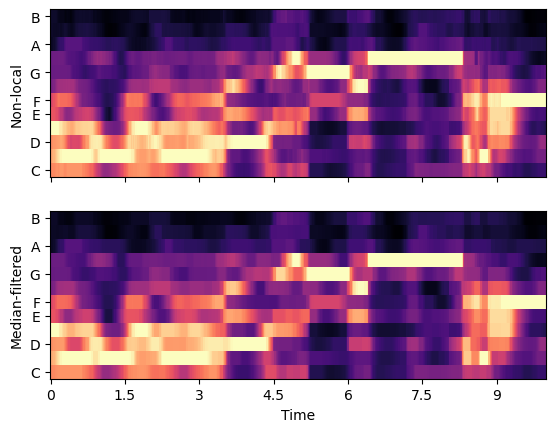

In [107]:
import scipy
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))


fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_filter, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='Non-local')
ax[0].label_outer()

librosa.display.specshow(chroma_smooth, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='Median-filtered')

[Text(0, 0.5, 'CQT')]

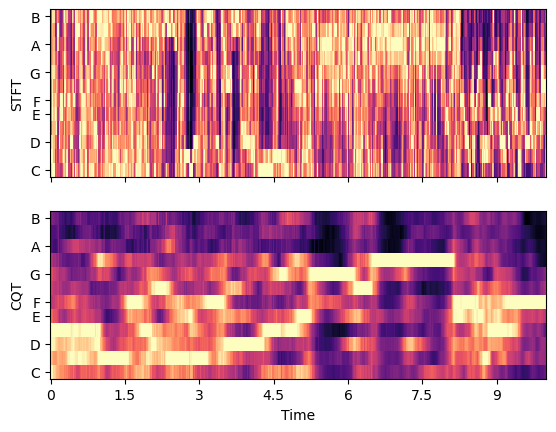

In [108]:
chromagram_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chromagram_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)


fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chromagram_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='STFT')
ax[0].label_outer()

librosa.display.specshow(chromagram_cqt, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='CQT')

[Text(0, 0.5, 'CENS')]

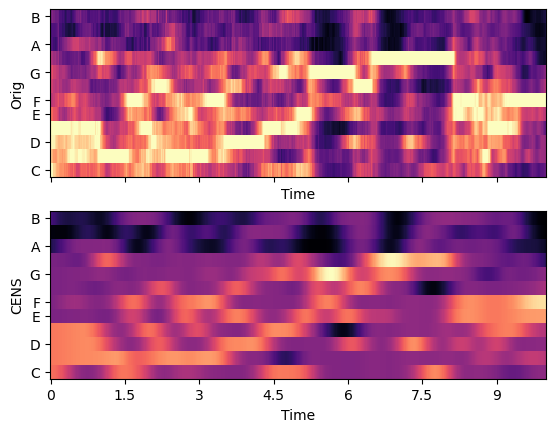

In [109]:
chromagram_cens = librosa.feature.chroma_cens(y=y, sr=sr)


fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chromagram_cqt, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='Orig')

librosa.display.specshow(chromagram_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='CENS')

[Text(0, 0.5, 'CENS')]

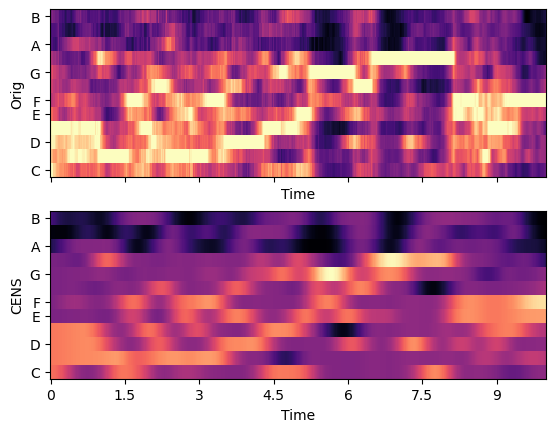

In [110]:
chromagram_cens = librosa.feature.chroma_cens(y=y, sr=sr)


fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chromagram_cqt, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='Orig')

librosa.display.specshow(chromagram_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='CENS')

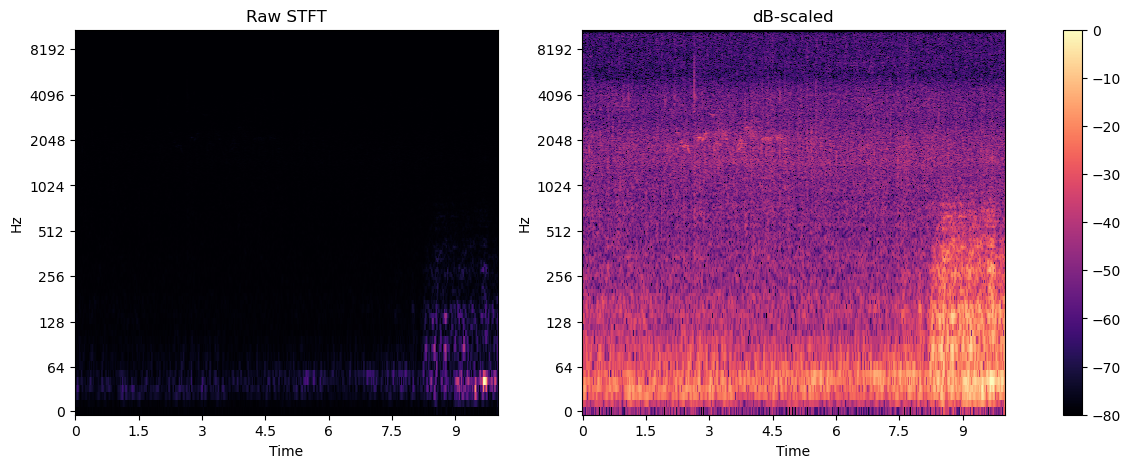

In [78]:
# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))


###################
# Plot the spectrum
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
img = librosa.display.specshow(S_full, y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set_title("Raw STFT")
img = librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set_title("dB-scaled")
fig.colorbar(img, ax=ax)

[Text(0.5, 1.0, 'MFCC')]

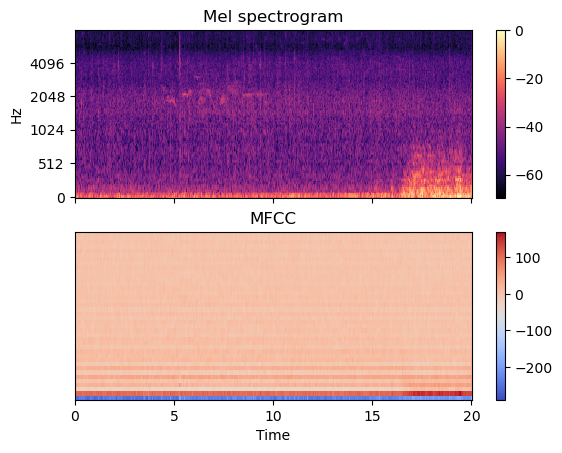

In [127]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)


fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

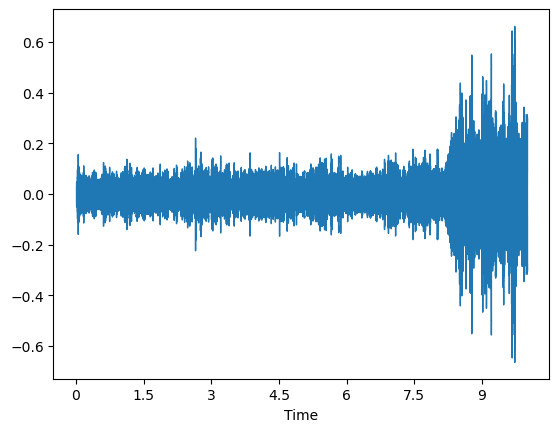

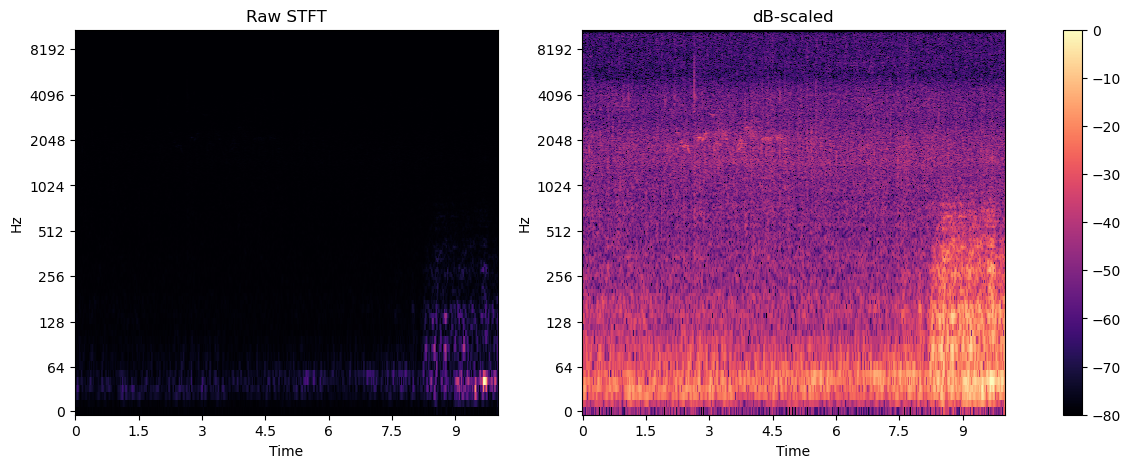

In [162]:
# Example audio w/ birds
y, sr = librosa.load(f"{path}/{birds[0]}.wav")

# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))


fig, ax = plt.subplots()
librosa.display.waveshow(y, sr=sr, ax=ax)
ax.label_outer()

###################
# Plot the spectrum
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
img = librosa.display.specshow(S_full, y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set_title("Raw STFT")
img = librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set_title("dB-scaled")
fig.colorbar(img, ax=ax)

Audio(data=y, rate=sr)

Comme prévu, il est impossible de voir où les chants d'oiseaux se trouvent sur la waveform de l'audio.

Sans convertir, il est impossible de se rendre compte de la présence d'un bruit aigu (tellement il est faible) sur le spectrogramme. Convertir le spectrogramme en décibels, l'échelle devient logarithmique. 

## "Clean" audio file (= proper recording)

In [163]:
# Example "clean" audio of birds
y, sr = librosa.load("../data/birds/original/0.mp3")

Audio(data=y, rate=sr)

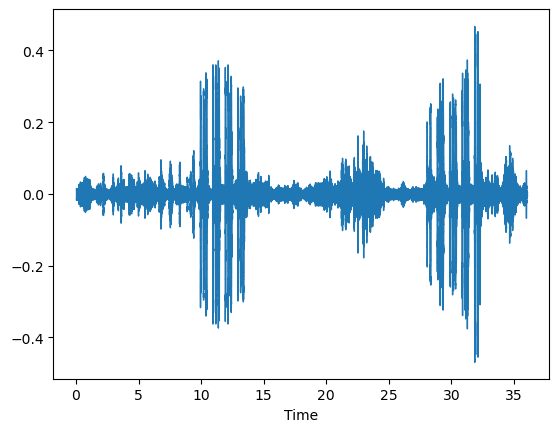

In [164]:
fig, ax = plt.subplots()
librosa.display.waveshow(y, sr=sr, ax=ax)
ax.label_outer()

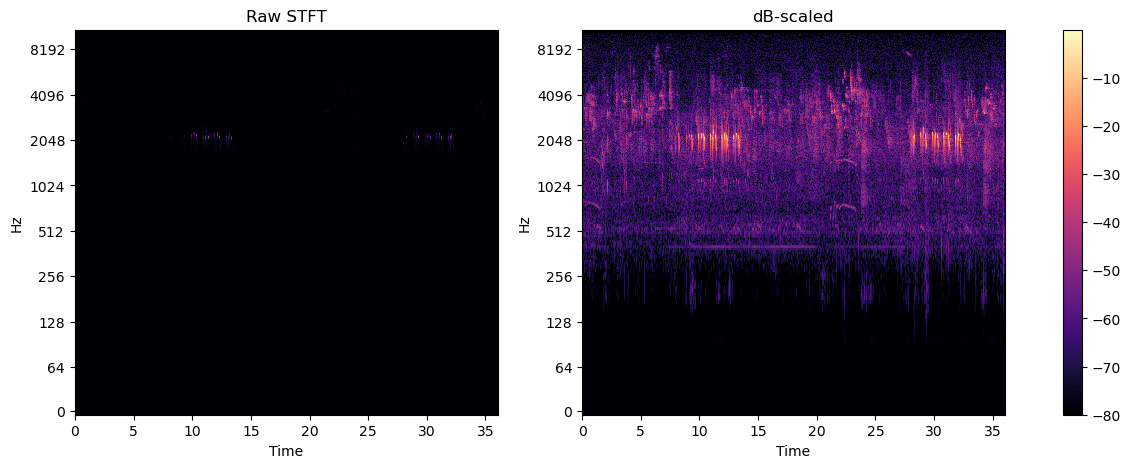

In [64]:
# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))


###################
# Plot the spectrum
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
img = librosa.display.specshow(S_full, y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set_title("Raw STFT")
img = librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set_title("dB-scaled")
fig.colorbar(img, ax=ax);